In [1]:
from Brillouin_analyzer import *

## Parse spectra from directory 
It returns 3d array with spectra.

In [2]:
example_spectra = parse_brillouin_directory(directory = 'data/example/Abbie_CRCells_1', 
                                            label = 'Abbie_CRCells_1')

## Plot one spectrum

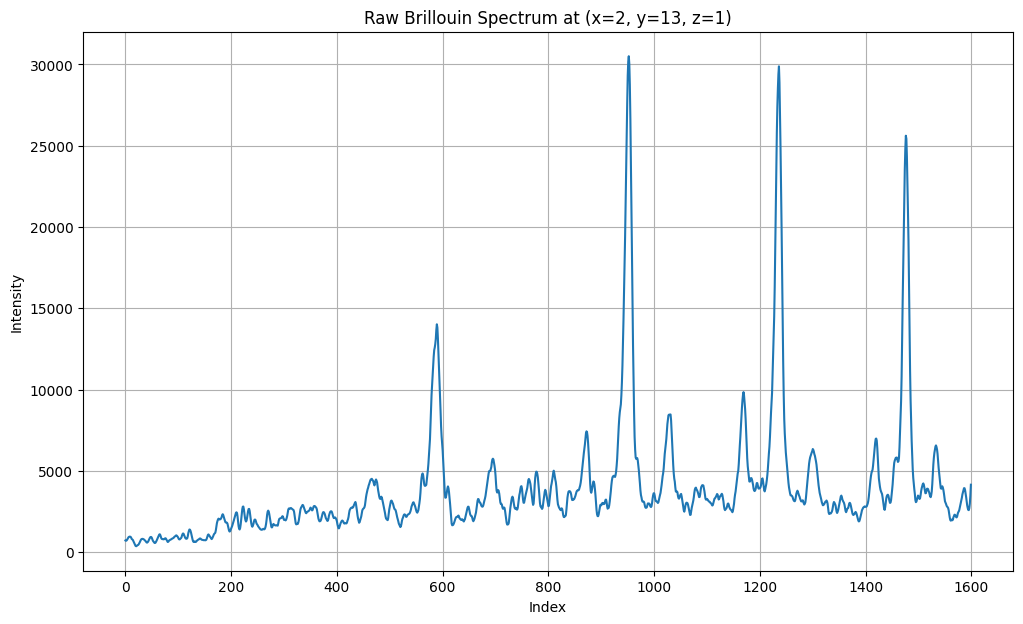

In [3]:
x = np.random.randint(0, example_spectra.shape[0])
y = np.random.randint(0, example_spectra.shape[1])
z = np.random.randint(0, example_spectra.shape[2])

plot_raw_spectra(example_spectra, x, y, z)

## Pre-process one spectra

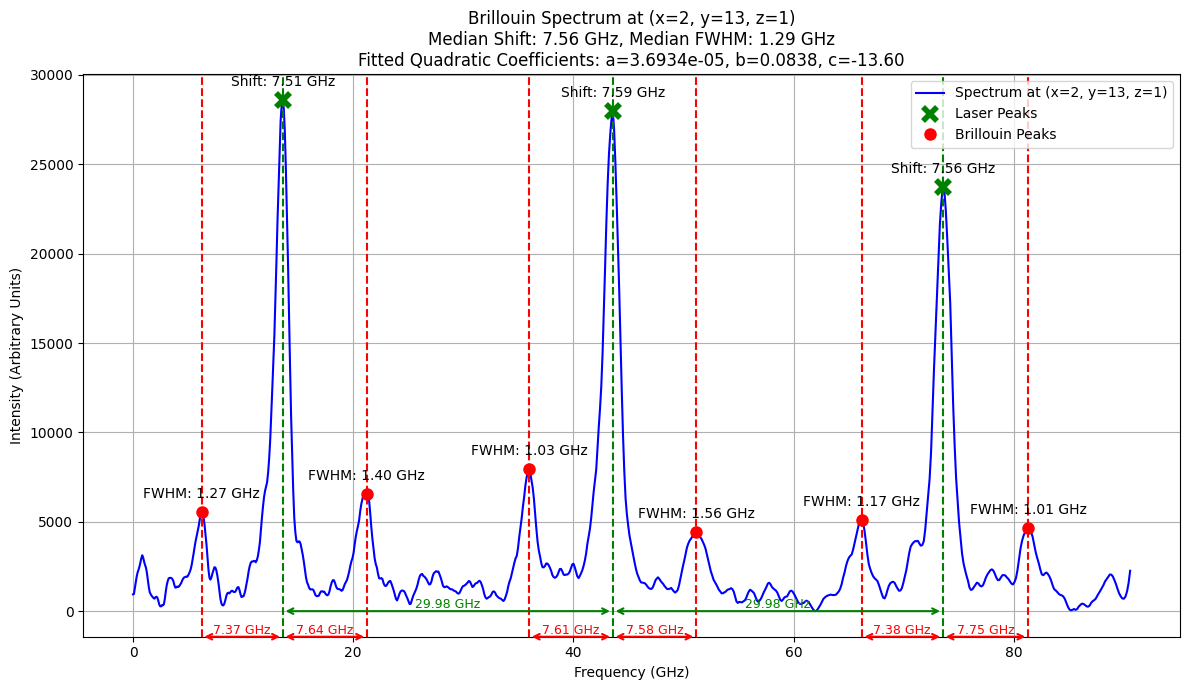

,Peak Index,Peak Type,FWHM,Shift
0,152,Laser,1.334849,7.505026
1,436,Laser,1.293883,7.594186
2,676,Laser,1.089913,7.560700
3,72,Brillouin Left,1.271438,7.369560
4,369,Brillouin Left,1.025880,7.609726
5,620,Brillouin Left,1.166263,7.375899
6,230,Brillouin Right,1.398260,7.640492
7,500,Brillouin Right,1.561886,7.578645
8,733,Brillouin Right,1.013562,7.745501


In [4]:
analyze_brillouin(
    example_spectra, x, y, z, 
    FSR=29.98, # Free Spectral Range value in GHz
    shift_range=(7.2, 7.7), # Min and max value for expected Brillouin shift in GHz
    shift_tolerance = 0.4, # How different the shifts can be from the median shift value after fitting in one spectrum(0.4 = 40%)
    prominence_range=(200, 400), # Minimum value of prominence that the peaks must have (see scipy.signal.peak_prominences)
    prominence_step=100, # Step for prominence iteration
    height_range=(1500, 5000), # Minimum value range for the height of peaks
    height_step=100, # Step for height iteration
    height_tolerance=15,  # How different the brilluen peak heights can be from the laser peak height (15 means that brillouin peak should be in the range of 1/15 to 15 times the laser peak height)
    symmetry_tolerance = 0.3,  # Tolerance for distance symmetry for Brillouin peaks before fitting. (0.2 means that distance from stoks to laser peak and from anti-stoks to laser peak not more than 20% different)
    FSR_tolerance = 1,  # Tolerance for the Free Spectral Range (FSR) in GHz
    max_exclusions=4,  # Sometimes noise peaks are more prominent that laser or Brillouin peaks. Function tries to find this impostors and exclude them. This is maximum number of possible exclusions.
    min_laser_peaks = 3, # Minimum amount of laser peaks that should be found in the spectrum
    min_peak_distance = 25,  # Minimum distance between peaks (in indexes)
    make_plot=True # If True, function will plot the results
    )

## Pre-processing all spectra
This function is not very resilient, sometimes it might kill your Kernel(

In [5]:
example_Z1 = get_brillouin_peaks_2d_list(
    brillouin_spectra=example_spectra,
    z=1, # Number of the layer in the 3D array
    shift_range=(7.2, 7.7),
    shift_tolerance=0.4,
    prominence_range=(200, 400),
    prominence_step=100,
    height_range=(1500, 5000),
    height_step=100,
    height_tolerance=15,
    symmetry_tolerance=0.3,
    FSR=29.98,
    FSR_tolerance = 1,
    max_exclusions=4,
    timeout_seconds=5 # If if won't manage to find the peaks in 5 seconds, it will return None and kill the process
)

Processing Brillouin Shift and FWHM}:   0%|          | 0/3600 [00:00<?, ?it/s]

  0%|          | 0/3600 [00:00<?, ?it/s]

## Making some plots

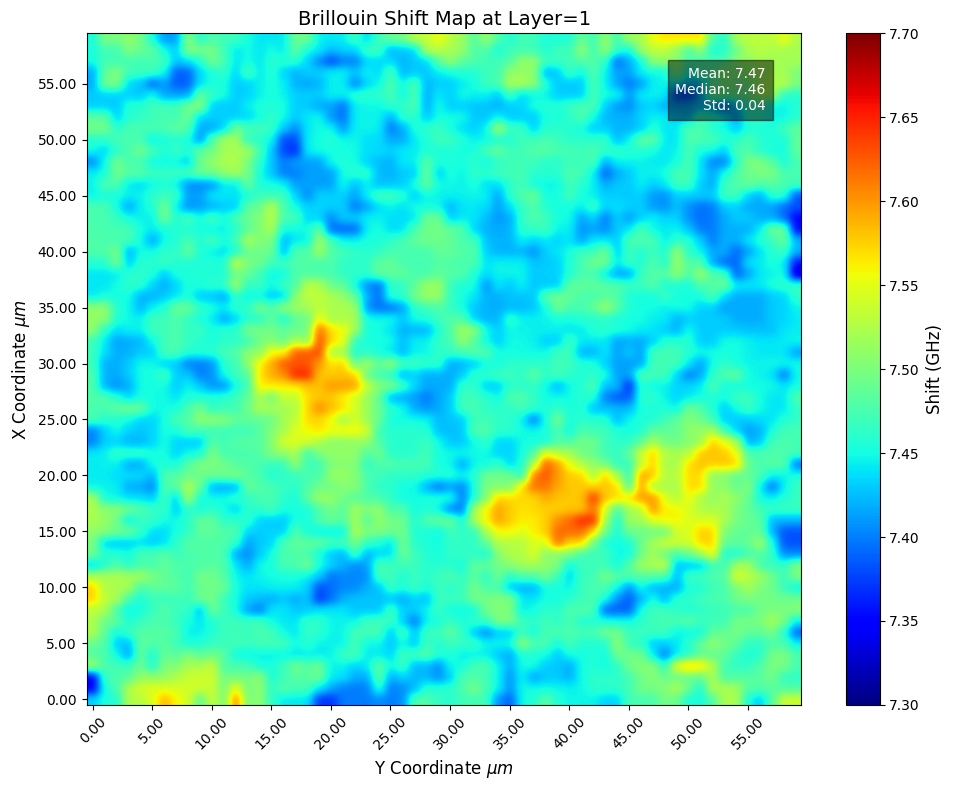

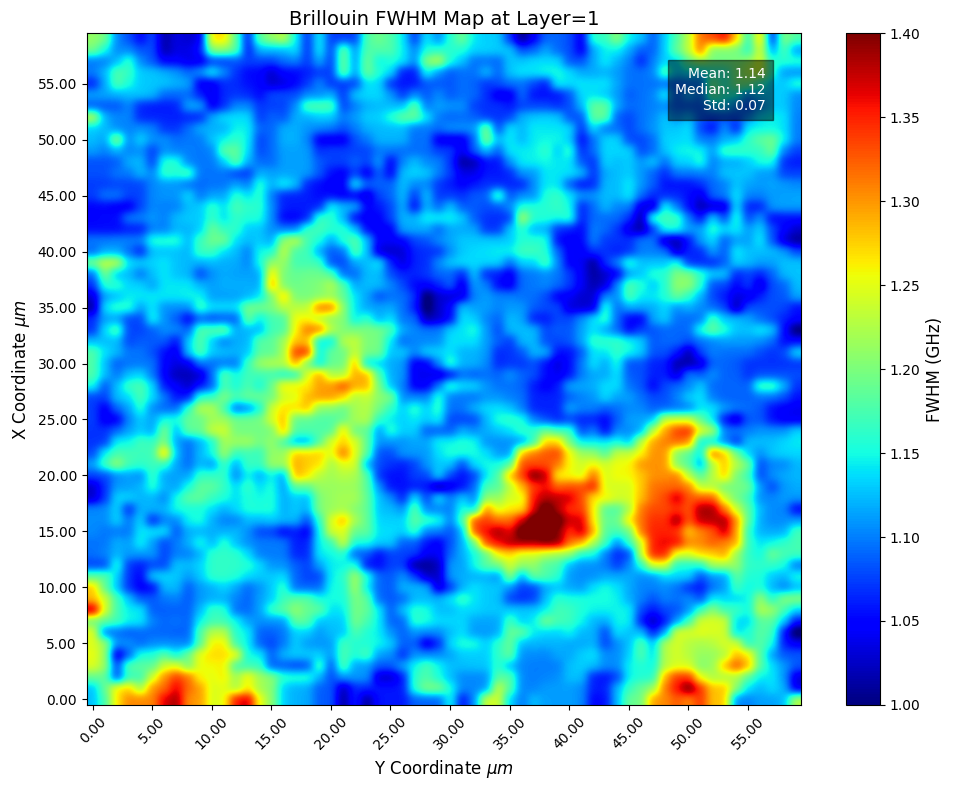

In [6]:
df_list = example_Z1
Z = 1
plot_brillouin_heatmap(
    df_list=df_list,
    title="Brillouin Shift Map at Layer=" + str(Z),
    data_type="shift",
    peaks = 'all', # all means it take average of all peaks, first - only first peaks (most left ones)
    pixel_size= 1, # Size of the pixel in micrometers
    apply_median_filter=True,
    median_filter_size=3,
    apply_gaussian_filter=False,
    gaussian_sigma=1,
    interpolate_nan=True,
    interpolation = 'gaussian',
    colorbar_range=(7.3, 7.7),
    cmap='jet',
    annotate=True
)

plot_brillouin_heatmap(
    df_list=df_list,
    title="Brillouin FWHM Map at Layer=" + str(Z),
    data_type="fwhm",
    peaks = 'all',
    pixel_size= 1,
    apply_median_filter=True,
    median_filter_size=3,
    apply_gaussian_filter=False,
    gaussian_sigma=1,
    interpolate_nan=True,
    interpolation = 'gaussian',
    colorbar_range=(1, 1.4),
    cmap='jet',
    annotate=True
)

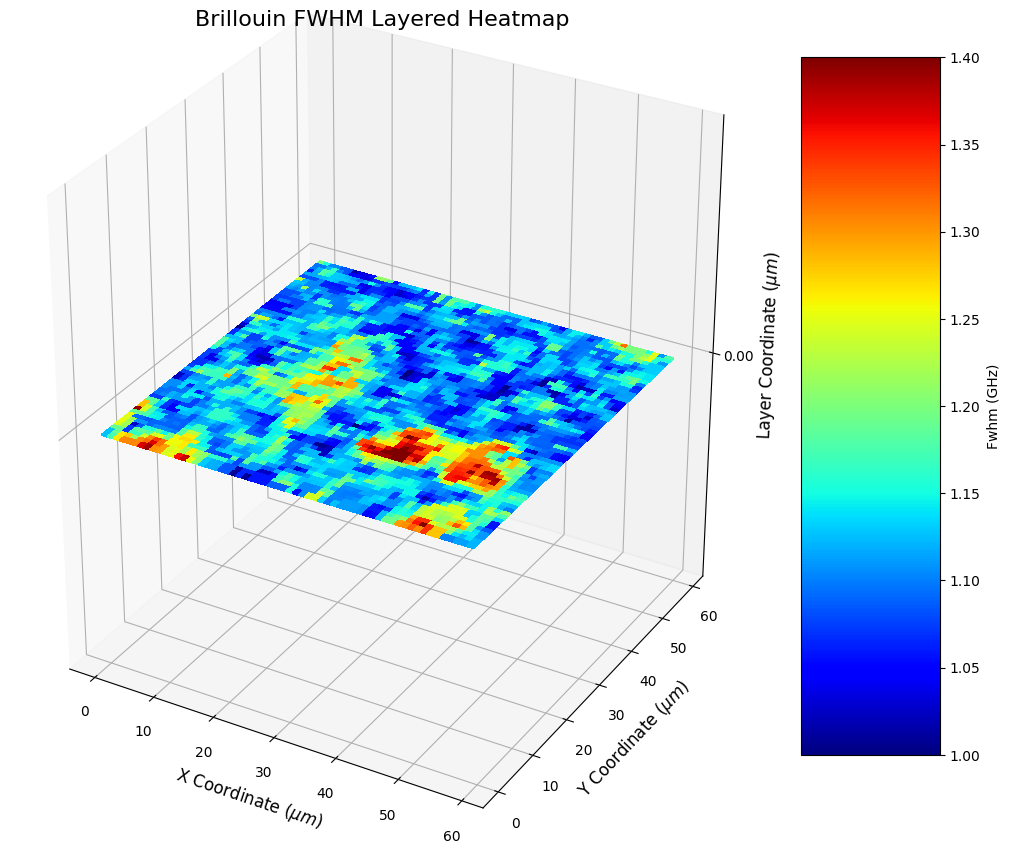

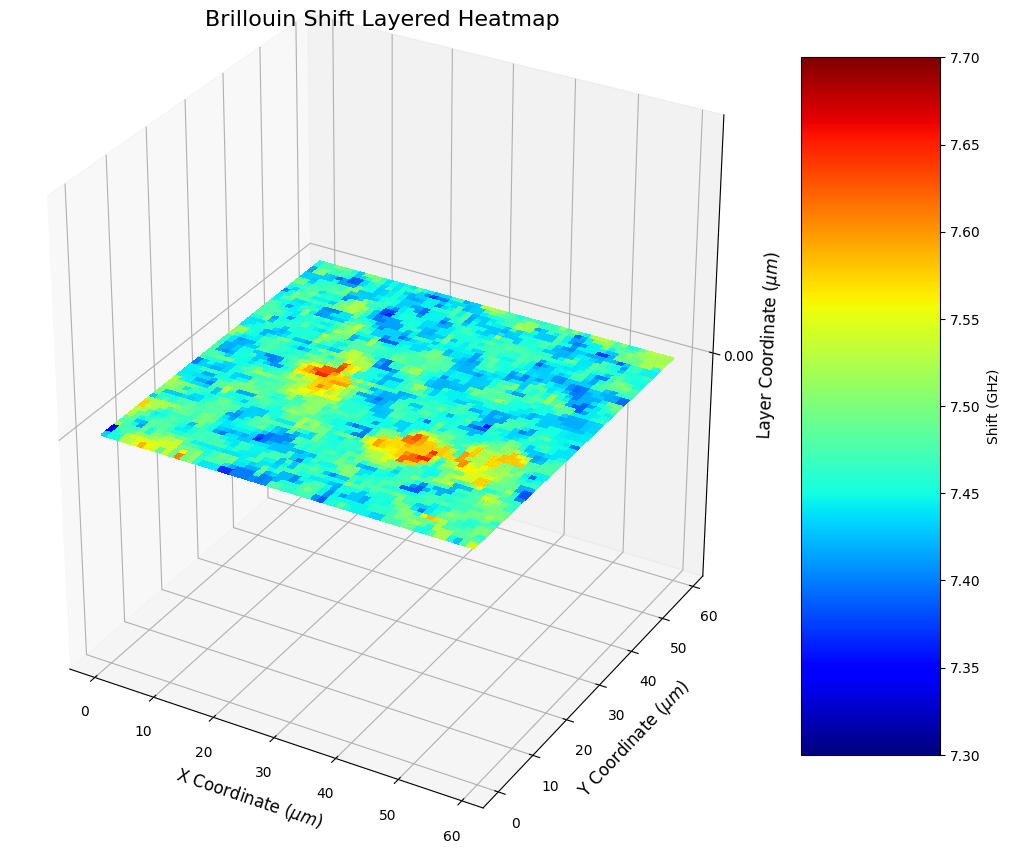

In [7]:
df_maps = [example_Z1]  # 2D data frames for each Z level
z_values = [0]  # Z values corresponding to each heatmap
plot_3d_surface_heatmaps(df_maps, z_values, title="Brillouin FWHM Layered Heatmap", data_type="fwhm", peaks='all', pixel_size=1, apply_median_filter = True, median_filter_size=3, colorbar_range=(1, 1.4), cmap='jet')
plot_3d_surface_heatmaps(df_maps, z_values, title="Brillouin Shift Layered Heatmap", data_type="shift", peaks='all', pixel_size=1, apply_median_filter = True, median_filter_size=3, colorbar_range=(7.3, 7.7), cmap='jet')